In [1]:
import pandas as pd
from sklearn import datasets
from typing import List
import math
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('preproc.csv')
train_df = df.iloc[:750,:]
test_df = df.iloc[750:,:]

train_x = train_df[["duration_ms", "danceability", "energy","speechiness","acousticness","instrumentalness","liveness"]]
train_y = train_df[["popularity"]]
test_x = test_df[["duration_ms", "danceability", "energy","speechiness","acousticness","instrumentalness","liveness"]]
test_y = test_df[["popularity"]]

In [9]:
ref_array = ["duration_ms", "danceability", "energy","speechiness","acousticness","instrumentalness","liveness"]

In [47]:
# calculate correlation between attributes and popularity

In [3]:
for x in ref_array:
    x_df = train_df[x].tolist()
    r = np.corrcoef(x_df,train_df['popularity'].tolist())
    print(f"correlation between {x} and popularity")
    print(r[0,1])
    print()

correlation between duration_ms and popularity
0.035922702745418485

correlation between danceability and popularity
0.009224575622939624

correlation between energy and popularity
-0.005163347464418312

correlation between speechiness and popularity
-0.06041408354937451

correlation between acousticness and popularity
-0.005132692110314079

correlation between instrumentalness and popularity
-0.14877249774447046

correlation between liveness and popularity
0.018983153901081795



In [77]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(train_x,train_y)
print(linear_model.score(train_x,train_y))

#testing the model and Displaying the output
linear_predict=linear_model.predict(testing_data)
l_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':linear_predict,'Actual Stream':testing_data_stream})
print(l_output)

0.03050150678610619


NameError: name 'testing_data' is not defined

In [6]:
poly = PolynomialFeatures(degree=4) 
trainx_poly= poly.fit_transform(train_x)

regr_quad = linear_model.LinearRegression()
regr_quad.fit(trainx_poly, train_y)

y_train_pred = regr_quad.predict(trainx_poly)
y_test_pred = regr_quad.predict(poly.fit_transform(test_x))

print('Intercept: \n', regr_quad.intercept_)
#print('Coefficients: \n', regr_quad.coef_)
print(f'Mean squared error: {mean_squared_error(test_y, y_test_pred)}')
print(f"Training R-Squared = {r2_score(train_y, y_train_pred)}")
print(f"Testing  R-Squared = {r2_score(test_y,  y_test_pred)}")



Intercept: 
 [27.67378042]
Mean squared error: 11301.384628270502
Training R-Squared = 0.07711053581580429
Testing  R-Squared = -23.988555821694682


In [30]:
poly = PolynomialFeatures(degree=5) 
trainx_poly= poly.fit_transform(train_x)

regr_quad = linear_model.LinearRegression()
regr_quad.fit(trainx_poly, train_y)

y_train_pred = regr_quad.predict(trainx_poly)
y_test_pred = regr_quad.predict(poly.fit_transform(test_x))

print('Intercept: \n', regr_quad.intercept_)
#print('Coefficients: \n', regr_quad.coef_)
print(f'Mean squared error: {mean_squared_error(test_y, y_test_pred)}')
print(f"Training R-Squared = {r2_score(train_y, y_train_pred)}")
print(f"Testing  R-Squared = {r2_score(test_y,  y_test_pred)}")

Intercept: 
 [30.62642724]
Mean squared error: 136235.20908741123
Training R-Squared = 0.08024854248837365
Testing  R-Squared = -300.23044557257936


In [79]:
x = 2
while x < 10:
    poly = PolynomialFeatures(degree=x) 
    trainx_poly= poly.fit_transform(train_x)

    regr_quad = linear_model.LinearRegression()
    regr_quad.fit(trainx_poly, train_y)

    y_train_pred = regr_quad.predict(trainx_poly)
    y_test_pred = regr_quad.predict(poly.fit_transform(test_x))

    print(f'Degree = {x}')

    mse = mean_squared_error(test_y, y_test_pred)
    mse_array.append(mse)
    print(f'Mean squared error: {mse}')

    train = r2_score(train_y, y_train_pred)
    train_array.append(train)
    print(f"Training R-Squared = {train}")


    test = r2_score(test_y,  y_test_pred)
    test_array.append(test)
    print(f"Testing  R-Squared = {test}")
    
    x+=1

Degree = 2
Mean squared error: 460.3819547442681
Training R-Squared = 0.07454591184083037
Testing  R-Squared = -0.017953158292658422
Degree = 3
Mean squared error: 974.7973428556567
Training R-Squared = 0.07607689854591004
Testing  R-Squared = -1.1553799483874352
Degree = 4
Mean squared error: 11301.384628270502
Training R-Squared = 0.07711053581580429
Testing  R-Squared = -23.988555821694682
Degree = 5
Mean squared error: 136235.20908741123
Training R-Squared = 0.08024854248837365
Testing  R-Squared = -300.23044557257936
Degree = 6
Mean squared error: 2200827.7160052434
Training R-Squared = 0.07975452015859552
Testing  R-Squared = -4865.262678801158
Degree = 7
Mean squared error: 7313868.364123618
Training R-Squared = 0.06416933648170653
Testing  R-Squared = -16170.735933333932
Degree = 8
Mean squared error: 20044126.638534527
Training R-Squared = 0.044161857327012055
Testing  R-Squared = -44318.6823999068
Degree = 9
Mean squared error: 11113116.636818156
Training R-Squared = 0.012525

In [78]:
mse_array = []
train_array =[]
test_array = []


In [65]:
mse_array


[460.3819547442681,
 974.7973428556567,
 11301.384628270502,
 136235.20908741123,
 2200827.7160052434,
 7313868.364123618,
 20044126.638534527,
 11113116.636818156,
 213810530.54615965,
 2031968409.4746685,
 17379597081.5026,
 135469190484.0972,
 981407599737.4592,
 6749204261922.497,
 44880644397356.26,
 292359592029719.0]

In [83]:
train_array


[0.07454591184083037,
 0.07607689854591004,
 0.07711053581580429,
 0.08024854248837365,
 0.07975452015859552,
 0.06416933648170653,
 0.044161857327012055,
 0.012525900270938473]

In [87]:
test_array

[-0.017953158292658422,
 -1.1553799483874352,
 -23.988555821694682,
 -300.23044557257936,
 -4865.262678801158,
 -16170.735933333932,
 -44318.6823999068,
 -24571.27539512847]

In [81]:
count_array = [2,3,4,5,6,7,8,9]

In [76]:
count_array

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [71]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, include:
%matplotlib inline

Text(0.5, 1.0, 'Degree Value vs R^2 Value of Training Set')

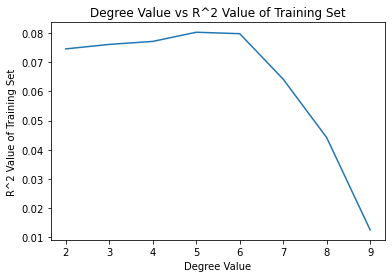

In [91]:
plt.plot(count_array, train_array)
plt.xlabel("Degree Value")
plt.ylabel("R^2 Value of Training Set")
plt.title("Degree Value vs R^2 Value of Training Set")

Text(0.5, 1.0, 'Degree Value vs R^2 Value of Testing Set')

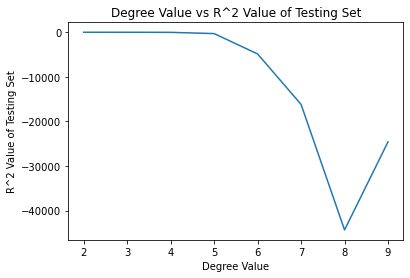

In [92]:
plt.plot(count_array, test_array)

plt.xlabel("Degree Value")
plt.ylabel("R^2 Value of Testing Set")
plt.title("Degree Value vs R^2 Value of Testing Set")

Text(0.5, 1.0, 'Degree Value vs MSE')

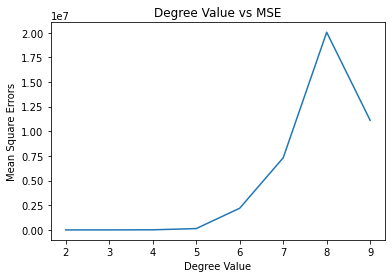

In [93]:
plt.plot(count_array, mse_array)
plt.xlabel("Degree Value")
plt.ylabel("Mean Square Errors")
plt.title("Degree Value vs MSE")